[Reference](https://wire.insiderfinance.io/is-a-recession-coming-data-analysis-of-past-recessions-and-investment-strategy-3d7752b3d9e4)

In [1]:
!pip install --upgrade pandas-datareader
!pip install --upgrade pandas

     |████████████████████████████████| 109 kB 5.5 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import re
import datetime as dt
import numpy as np
from scipy.stats import gaussian_kde
import pandas_datareader.data as web
data_dir = "./data/yield_spread_and_recessions"
os.makedirs(data_dir, exist_ok=True)

In [4]:
# get historical data of S&P500(^GSPC)
sp_500 = web.DataReader('^GSPC', 'yahoo', start='1920-01-01', end='2022-04-08')
print(sp_500.shape)
# save the data
sp500_file_path = f"{data_dir}/S&P500.csv"
sp_500.to_csv(sp500_file_path)
sp_500 = pd.read_csv(sp500_file_path, index_col="Date", parse_dates=True)
sp_500.head(3)

(23682, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,17.660000
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,17.760000
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,17.719999


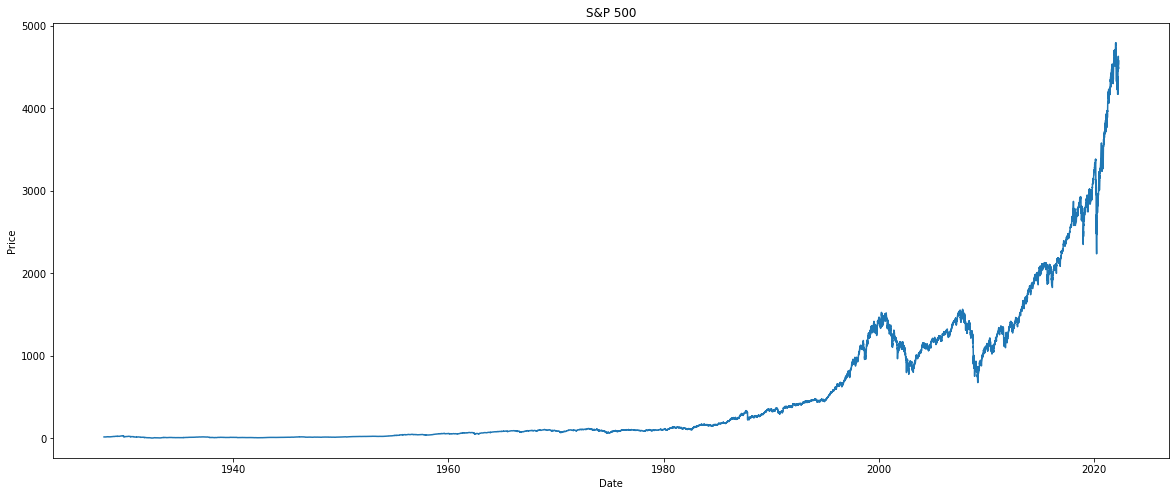

In [5]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(sp_500.index, sp_500["Close"])
ax.set_title("S&P 500")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
plt.show()

In [6]:
start = dt.datetime(1976, 6, 1)
end = dt.datetime(2022, 4, 8)
yeild_spread = web.DataReader('T10Y2Y', 'fred', start, end)
# save the data
file_path = f"{data_dir}/T10Y2Y.csv"
yeild_spread.to_csv(file_path)
yeild_spread = pd.read_csv(file_path, index_col="DATE", parse_dates=True)
yeild_spread.head(3)

,T10Y2Y
DATE,
1976-06-01,0.68
1976-06-02,0.71
1976-06-03,0.70


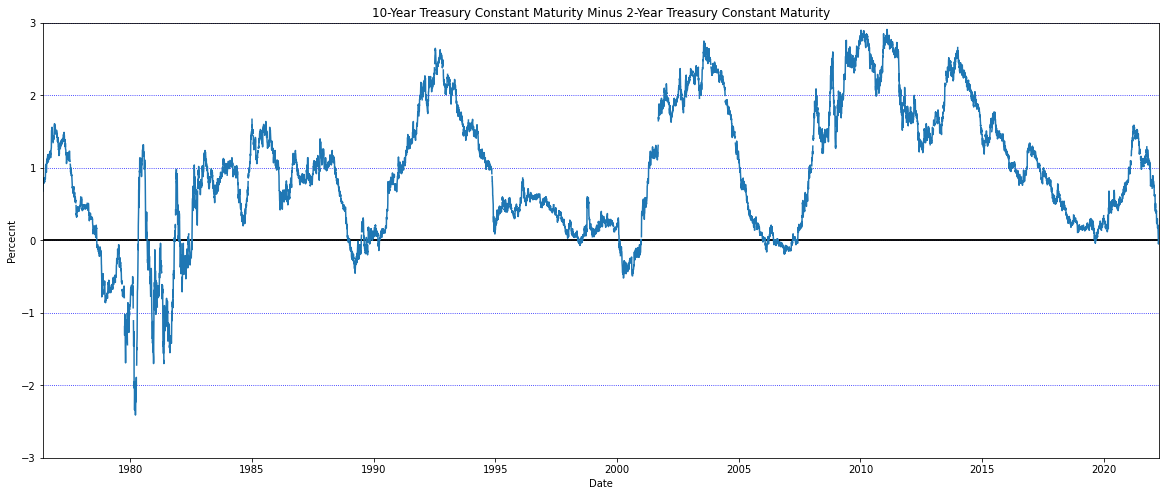

In [7]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(yeild_spread)
ax.hlines([0,0],start, end, colors="black")
ax.grid(axis='y',linestyle='dotted', color='b')
ax.set_title("10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity")
ax.set_xlabel("Date")
ax.set_ylabel("Percecnt")
ax.set_xlim(start, end)
ax.set_ylim(-3, 3)
plt.show()

In [8]:
business_cycle = pd.read_html("https://www.nber.org/research/data/us-business-cycle-expansions-and-contractions")[0]
# save the data
business_cycle_file_path = f"{data_dir}/business_cycle.csv"
business_cycle.to_csv(business_cycle_file_path, index=False)
business_cycle = pd.read_csv(business_cycle_file_path, header=1)
business_cycle = business_cycle.iloc[1:].reset_index(drop=True)
business_cycle.head(3)

,Peak Month,Peak Year,Peak Quarter,Trough Month,Trough Year,Trough Quarter,Peak to Trough (Months),Previous Trough to this Peak (Months),Trough from Previous Trough (Months),Peak from Previous Peak (Months),Unnamed: 10_level_1
0,June,1857,2,December,1858,4,18,30,48,-,NaN
1,*October,1860,3,*June,1861,3,8,22,30,40,NaN
2,*April,1865,1,*December,1867,Trough occurred 1868Q1,32,46,78,54,NaN


[(datetime.datetime(2001, 3, 1, 0, 0), datetime.datetime(2001, 11, 1, 0, 0)), (datetime.datetime(2007, 12, 1, 0, 0), datetime.datetime(2009, 6, 1, 0, 0)), (datetime.datetime(2020, 2, 1, 0, 0), datetime.datetime(2020, 4, 1, 0, 0))]


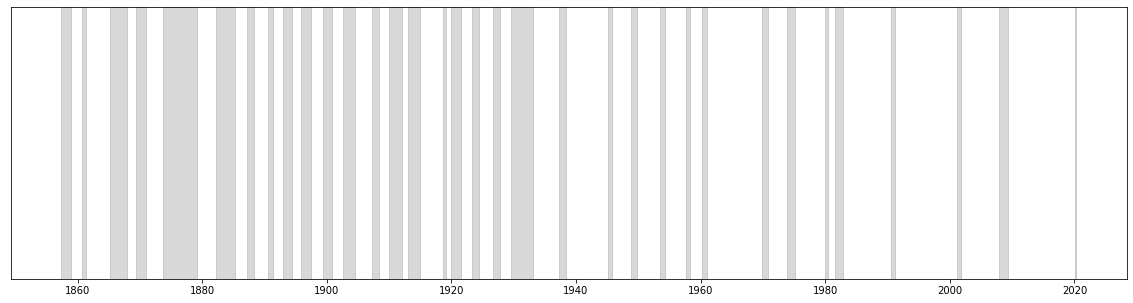

In [9]:
cycle_list = []
for i in range(len(business_cycle)):
    row = business_cycle.iloc[i]
    peak_month = re.sub("\*","",row["Peak Month"])
    peak = dt.datetime.strptime(f"{row['Peak Year']}{peak_month}", "%Y%B")
    trough_month = re.sub("\*","",row["Trough Month"])
    trough = dt.datetime.strptime(f"{row['Trough Year']}{trough_month}", "%Y%B")
    cycle_list.append((peak, trough))
print(cycle_list[-3:])
fig, ax = plt.subplots(figsize=(20, 5))
for x in cycle_list:
    ax.axvspan(x[0], x[1], color="gray", alpha=0.3)
ax.get_yaxis().set_visible(False)
plt.show()

average: 41.35294117647059 months


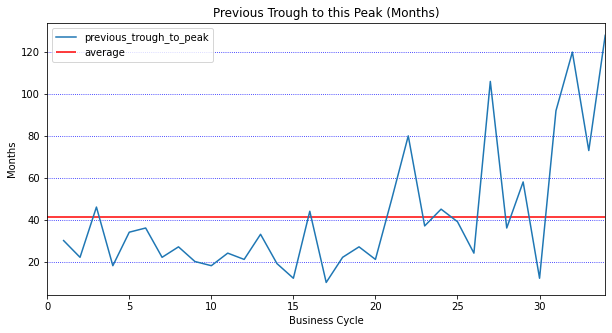

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
previous_trough_to_peak = business_cycle["Previous Trough to this Peak (Months)"].astype(int)
print(f"average: {previous_trough_to_peak.mean()} months")
ax.plot(business_cycle.index + 1, previous_trough_to_peak, label="previous_trough_to_peak")
ax.hlines(previous_trough_to_peak.mean(), 0, len(previous_trough_to_peak), colors="red", label="average")
ax.grid(axis='y',linestyle='dotted', color='b')
ax.set_title("Previous Trough to this Peak (Months)")
ax.set_xlabel("Business Cycle")
ax.set_ylabel("Months")
ax.set_xlim(0,len(previous_trough_to_peak))
ax.legend()
plt.show()

average: 17.0 months


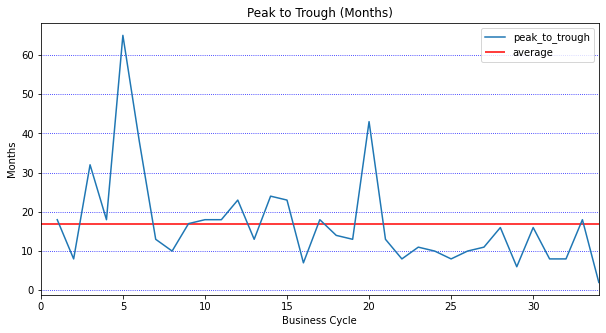

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
peak_to_trough = business_cycle["Peak to Trough (Months)"].astype(int)
print(f"average: {peak_to_trough.mean()} months")
ax.plot(business_cycle.index + 1, peak_to_trough, label="peak_to_trough")
ax.hlines(peak_to_trough.mean(), 0, len(peak_to_trough), colors="red", label="average")
ax.grid(axis='y',linestyle='dotted', color='b')
ax.set_title("Peak to Trough (Months)")
ax.set_xlabel("Business Cycle")
ax.set_ylabel("Months")
ax.set_xlim(0,len(peak_to_trough))
ax.legend()
plt.show()

# Recession Analysis


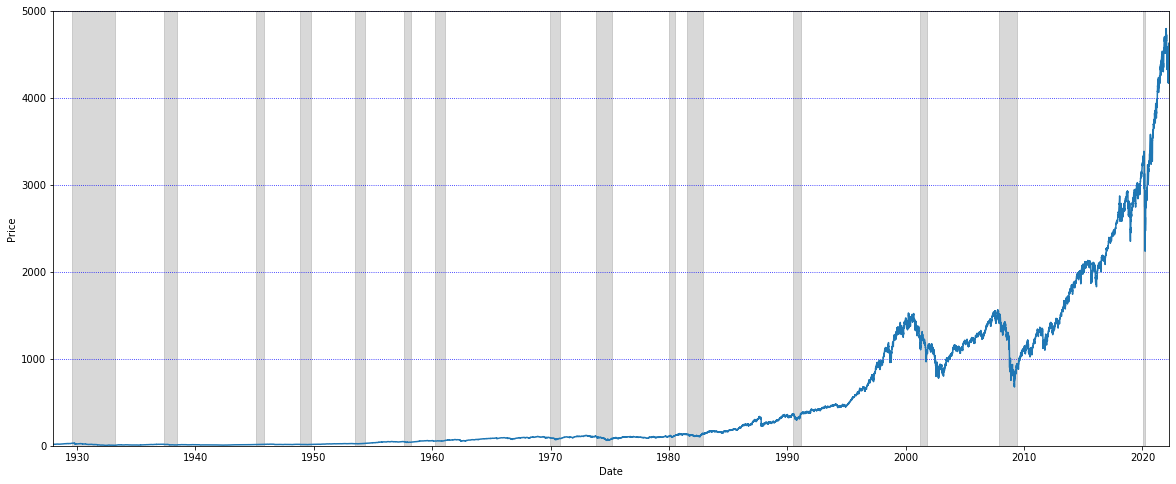

In [12]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(sp_500.index, sp_500["Close"])
for x in cycle_list:
    ax.axvspan(x[0], x[1], color="gray", alpha=0.3)
ax.grid(axis='y',linestyle='dotted', color='b')
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_xlim(sp_500.index[0], end)
ax.set_ylim(0, 5000)
plt.show()

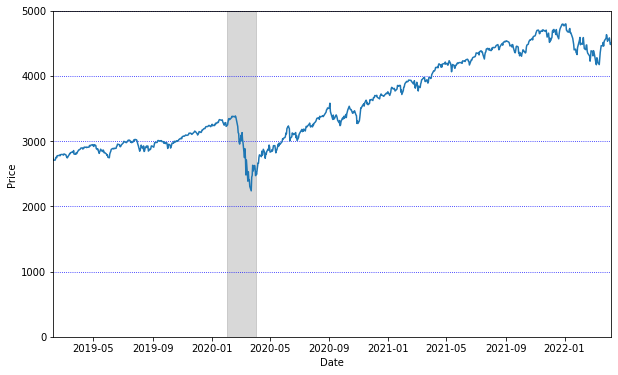

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sp_500.index, sp_500["Close"])
for x in cycle_list:
    ax.axvspan(x[0], x[1], color="gray", alpha=0.3)
ax.grid(axis='y',linestyle='dotted', color='b')
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_xlim(sp_500.index[-800], end)
ax.set_ylim(0, 5000)
plt.show()

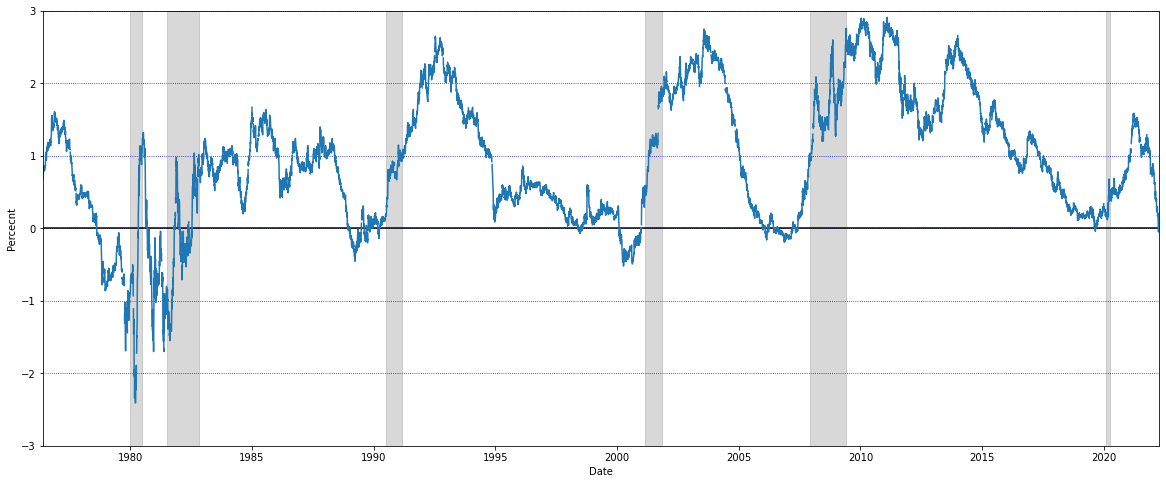

In [14]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(yeild_spread)
for x in cycle_list:
    ax.axvspan(x[0], x[1], color="gray", alpha=0.3)
ax.hlines(0, start, end, colors="black")
ax.grid(axis='y',linestyle='dotted', color='b')
ax.set_xlabel("Date")
ax.set_ylabel("Percecnt")
ax.set_xlim(yeild_spread.index[0], yeild_spread.index[-1])
ax.set_ylim(-3, 3)
plt.show()

DatetimeIndex(['1978-08-18', '1980-09-12', '1981-10-27', '1981-10-29',
               '1981-11-05', '1982-01-14', '1982-01-18', '1982-01-20',
               '1982-05-21', '1982-06-02', '1982-06-04', '1982-07-13',
               '1988-12-13', '1989-01-04', '1989-08-11', '1989-09-18',
               '1989-11-03', '1990-03-08', '1998-06-09', '1998-06-15',
               '1998-07-21', '2000-02-02', '2000-02-11', '2000-12-28',
               '2005-12-29', '2006-01-31', '2006-03-21', '2006-06-08',
               '2006-06-30', '2006-08-02', '2006-08-07', '2006-08-14',
               '2006-08-17', '2007-05-03', '2007-05-30', '2019-08-27',
               '2022-04-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)


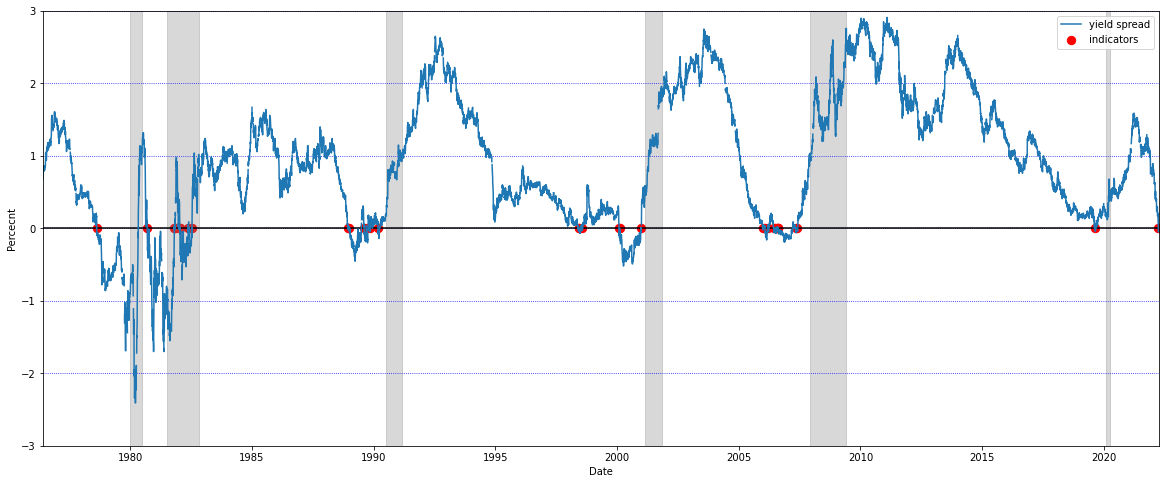

In [15]:
turning_points = (yeild_spread * yeild_spread.shift() <= 0) & (yeild_spread < 0)
turning_points = turning_points[turning_points["T10Y2Y"]==True]
print(turning_points.index)
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(yeild_spread, label="yield spread")
for x in cycle_list:
    ax.axvspan(x[0], x[1], color="gray", alpha=0.3)
ax.scatter(turning_points.index, [0]*len(turning_points), s=70, color="red", label="indicators")
ax.hlines(0, start, end, colors="black")
ax.grid(axis='y',linestyle='dotted', color='b')
ax.set_xlabel("Date")
ax.set_ylabel("Percecnt")
ax.set_xlim(start, end)
ax.set_ylim(-3, 3)
ax.legend()
plt.show()

In [16]:
turning_point_date = list(turning_points.index)
indicators = []
latest_7_cycles = cycle_list[27:]
print("latest_7_cycles:", latest_7_cycles)
for cycle in latest_7_cycles:
    candidate_points = [x  > cycle[1] for x in turning_point_date]
    index = candidate_points.index(True)
    indicators.append(turning_point_date[index])
print("\nindicators:", indicators)

latest_7_cycles: [(datetime.datetime(1973, 11, 1, 0, 0), datetime.datetime(1975, 3, 1, 0, 0)), (datetime.datetime(1980, 1, 1, 0, 0), datetime.datetime(1980, 7, 1, 0, 0)), (datetime.datetime(1981, 7, 1, 0, 0), datetime.datetime(1982, 11, 1, 0, 0)), (datetime.datetime(1990, 7, 1, 0, 0), datetime.datetime(1991, 3, 1, 0, 0)), (datetime.datetime(2001, 3, 1, 0, 0), datetime.datetime(2001, 11, 1, 0, 0)), (datetime.datetime(2007, 12, 1, 0, 0), datetime.datetime(2009, 6, 1, 0, 0)), (datetime.datetime(2020, 2, 1, 0, 0), datetime.datetime(2020, 4, 1, 0, 0))]

indicators: [Timestamp('1978-08-18 00:00:00'), Timestamp('1980-09-12 00:00:00'), Timestamp('1988-12-13 00:00:00'), Timestamp('1998-06-09 00:00:00'), Timestamp('2005-12-29 00:00:00'), Timestamp('2019-08-27 00:00:00'), Timestamp('2022-04-01 00:00:00')]


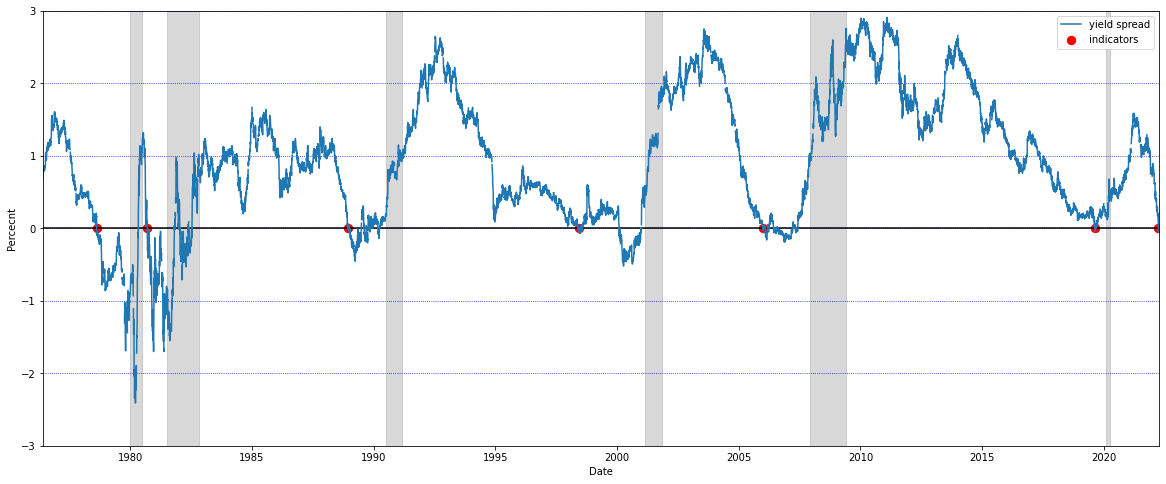

In [17]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(yeild_spread, label="yield spread")
for x in cycle_list:
    ax.axvspan(x[0], x[1], color="gray", alpha=0.3)
ax.scatter(indicators, [0]*len(indicators), s=70, color="red", label="indicators")
ax.hlines(0, start, end, colors="black")
ax.grid(axis='y',linestyle='dotted', color='b')
ax.set_xlabel("Date")
ax.set_ylabel("Percecnt")
ax.set_xlim(start, end)
ax.set_ylim(-3, 3)
ax.legend()
plt.show()

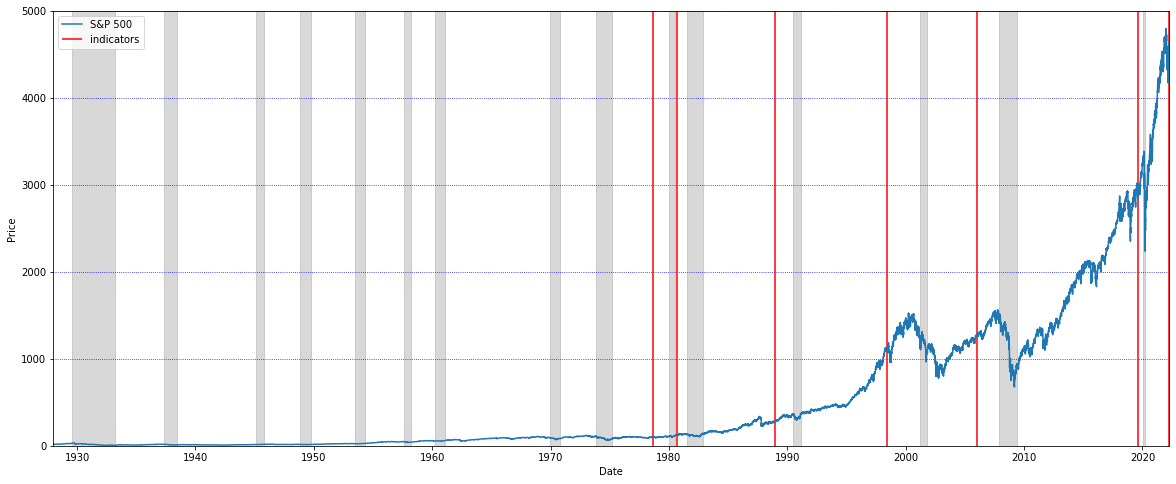

In [18]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(sp_500.index, sp_500["Close"], label="S&P 500")
for x in cycle_list:
    ax.axvspan(x[0], x[1], color="gray", alpha=0.3)
ax.vlines(indicators, 0, 5000, colors="red", label="indicators")
ax.grid(axis='y',linestyle='dotted', color='b')
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_xlim(sp_500.index[0], end)
ax.set_ylim(0, 5000)
ax.legend()
plt.show()

In [19]:
cycles_and_indicators = pd.DataFrame(latest_7_cycles, columns=["peak", "trough"])
cycles_and_indicators["indicator"] = indicators
days_after_indicator = cycles_and_indicators["peak"] - cycles_and_indicators.shift()["indicator"]
cycles_and_indicators["days_after_indicator"] = days_after_indicator
cycles_and_indicators

,peak,trough,indicator,days_after_indicator
0,1973-11-01,1975-03-01,1978-08-18,NaT
1,1980-01-01,1980-07-01,1980-09-12,501 days
2,1981-07-01,1982-11-01,1988-12-13,292 days
3,1990-07-01,1991-03-01,1998-06-09,565 days
4,2001-03-01,2001-11-01,2005-12-29,996 days
5,2007-12-01,2009-06-01,2019-08-27,702 days
6,2020-02-01,2020-04-01,2022-04-01,158 days


In [20]:
print(cycles_and_indicators.loc[6, "indicator"] + dt.timedelta(days=158))
# Timestamp('2022-09-06 00:00:00')

2022-09-06 00:00:00
